In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
df_1999 = pd.read_csv("../data/ResaleFlatPricesBasedonApprovalDate19901999.csv")
df_2012 = pd.read_csv("../data/ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv")
df_2014 = pd.read_csv("../data/ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv")
df_2016 = pd.read_csv("../data/ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv")
df_2017 = pd.read_csv("../data/ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv")

In [53]:
# Pipelines

# checking for Na and duplicates
def clean_dataset(df, dataset_name):
    print(f"Cleaning dataset: {dataset_name}")
    
    # Check for duplicates
    duplicates_count = df.duplicated().sum()
    print(f"{dataset_name}: Number of duplicates: {duplicates_count}")
    
    # Drop duplicates
    df_cleaned = df.drop_duplicates()
    
    # Check for missing values
    missing_values = df_cleaned.isna().sum()
    print(f"{dataset_name}: Missing values per column:")
    print(missing_values)
    
    return df_cleaned

# splitting categorical and numerical values:
def split_categorical_numerical(df):
    categorical_columns = df.select_dtypes(include=['object'])
    numerical_columns = df.select_dtypes(include=['number'])
    return categorical_columns, numerical_columns

In [22]:
# Clean and split each dataset, and save them with variable names

# 1. Clean and split df_1999
df_1999_cleaned = clean_dataset(df_1999, "1999")
df_1999_col, df_1999_num = split_categorical_numerical(df_1999_cleaned)

# 2. Clean and split df_2012
df_2012_cleaned = clean_dataset(df_2012, "2012")
df_2012_col, df_2012_num = split_categorical_numerical(df_2012_cleaned)

# 3. Clean and split df_2014
df_2014_cleaned = clean_dataset(df_2014, "2014")
df_2014_col, df_2014_num = split_categorical_numerical(df_2014_cleaned)

# 4. Clean and split df_2016
df_2016_cleaned = clean_dataset(df_2016, "2016")
df_2016_col, df_2016_num = split_categorical_numerical(df_2016_cleaned)

# 5. Clean and split df_2017
df_2017_cleaned = clean_dataset(df_2017, "2017")
df_2017_col, df_2017_num = split_categorical_numerical(df_2017_cleaned)


Cleaning dataset: 1999
1999: Number of duplicates: 826
1999: Missing values per column:
month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
dtype: int64
Cleaning dataset: 2012
2012: Number of duplicates: 513
2012: Missing values per column:
month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
dtype: int64
Cleaning dataset: 2014
2014: Number of duplicates: 248
2014: Missing values per column:
month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_comm

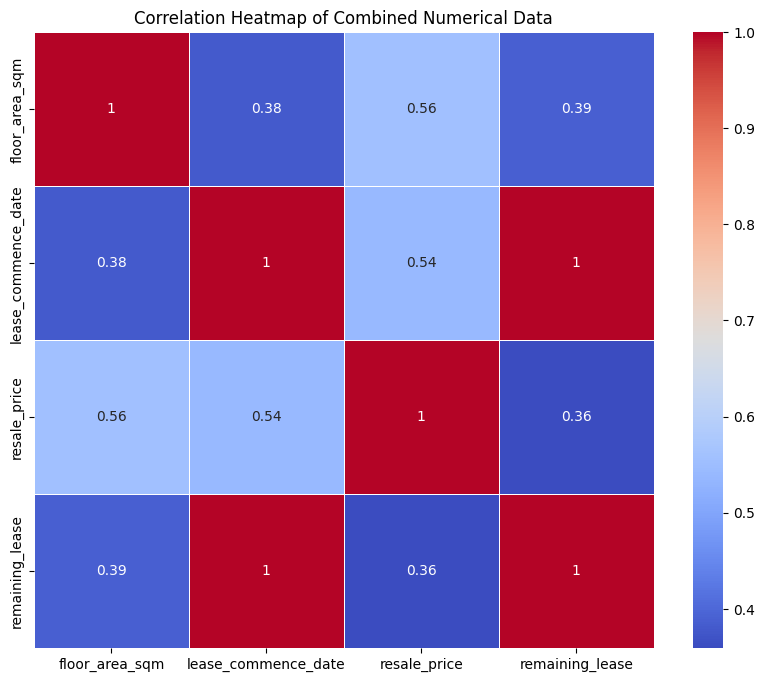

In [54]:
# creating a heat map of the numerical values
numerical_combined = pd.concat([df_1999_num, df_2012_num, df_2014_num, df_2016_num, df_2017_num])
correlation_matrix = numerical_combined.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Combined Numerical Data')
plt.show()

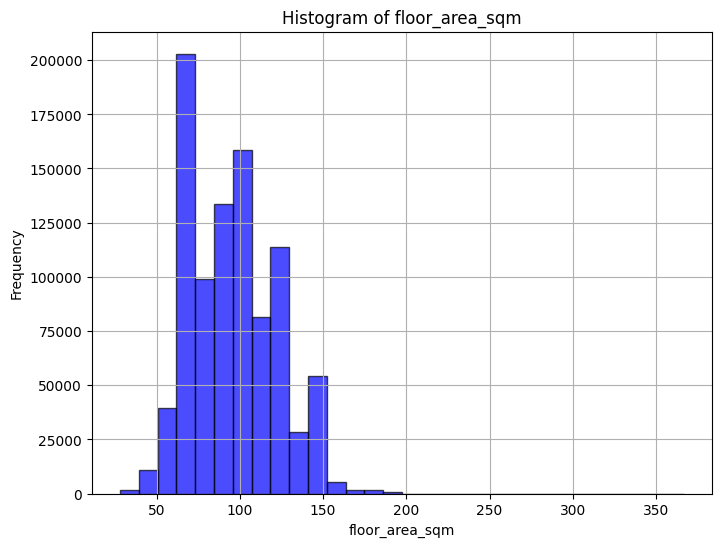

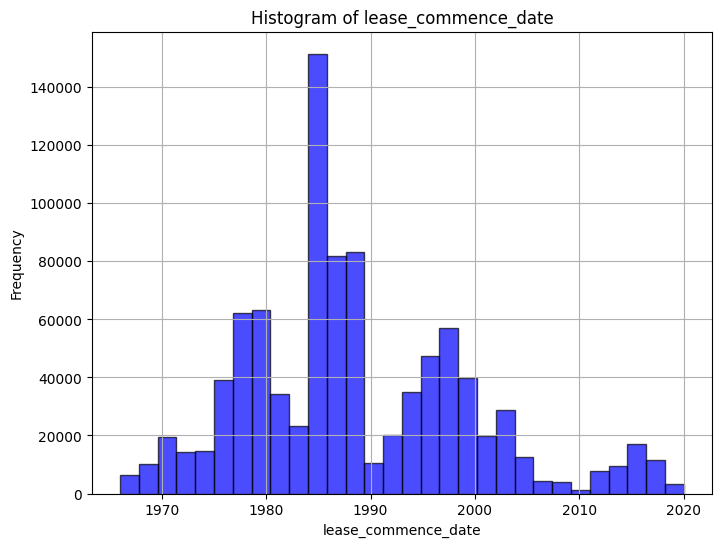

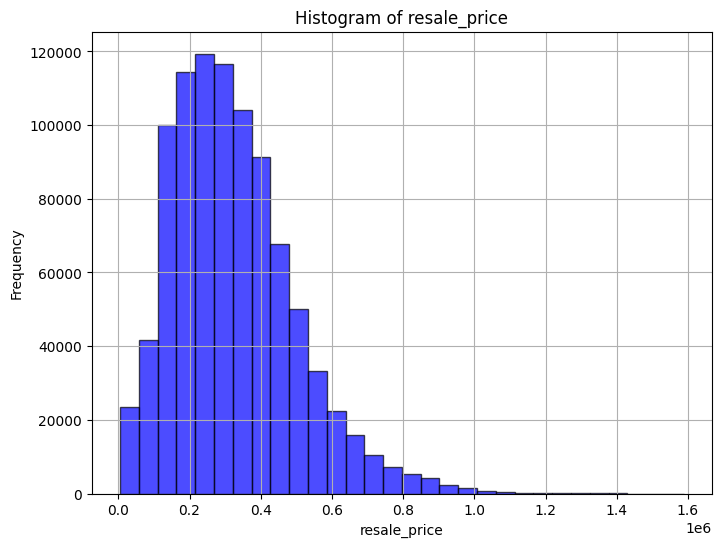

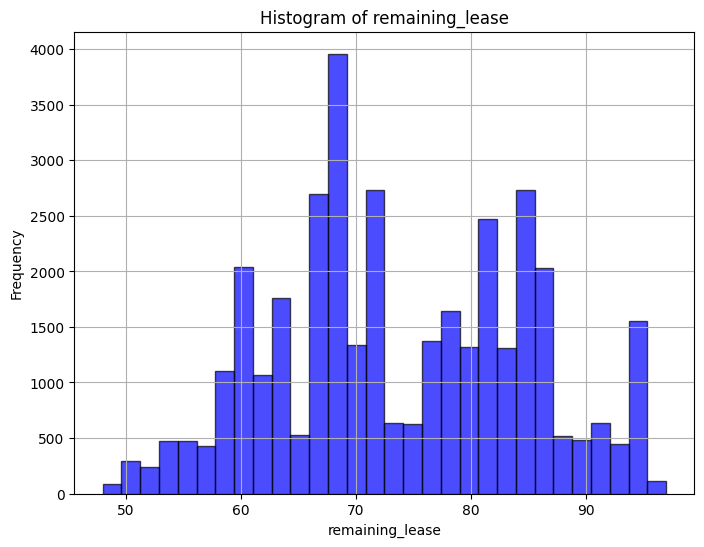

In [55]:
numerical_columns = numerical_combined.columns
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    plt.hist(numerical_combined[column], bins=30, color='blue', alpha=0.7, edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

In [ ]:
#make values in coloumn consistant in form

df_1999_cleaned['flat_model'] = df_1999_cleaned['flat_model'].str.strip().stry.upper()
df_2012_cleaned['flat_model'] = df_2012_cleaned['flat_model'].str.strip().stry.upper()
df_2014_cleaned['flat_model'] = df_2014_cleaned['flat_model'].str.strip().stry.upper()
df_2016_cleaned['flat_model'] = df_2016_cleaned['flat_model'].str.strip().stry.upper()
df_2017_cleaned['flat_model'] = df_2017_cleaned['flat_model'].str.strip().stry.upper()



In [56]:
#Data Normalisation

#flat model
df_2017_cleaned['flat_model'] = df_2017_cleaned['flat_model'].str.strip().str.upper()
df_2016_cleaned['flat_model'] = df_2016_cleaned['flat_model'].str.strip().str.upper()
df_2014_cleaned['flat_model'] = df_2014_cleaned['flat_model'].str.strip().str.upper()
df_2012_cleaned['flat_model'] = df_2012_cleaned['flat_model'].str.strip().str.upper()
df_1999_cleaned['flat_model'] = df_1999_cleaned['flat_model'].str.strip().str.upper()


In [ ]:

#remaining_lease

def convert_remaining_lease(duration):
    split_words = duration.split()
    year = 0
    month = 0
    n = len(split_words)

    for i in range(n):
        if  split_words[i] == 'years':
            year = split_words[i-1]
        if  split_words[i] == 'months':
            month = split_words[i-1]

    value = int(year) + int(month)/12

    return value

df_2017_cleaned['remaining_lease'] = df_2017_cleaned['remaining_lease'].apply(convert_remaining_lease)


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,IMPROVED,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,NEW GENERATION,1981,65,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,NEW GENERATION,1980,64,285000.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,NEW GENERATION,1979,63,290000.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,NEW GENERATION,1980,64,290000.0
...,...,...,...,...,...,...,...,...,...,...,...
37148,2016-12,YISHUN,5 ROOM,297,YISHUN ST 20,13 TO 15,112.0,IMPROVED,2000,82,488000.0
37149,2016-12,YISHUN,5 ROOM,838,YISHUN ST 81,01 TO 03,122.0,IMPROVED,1987,69,455000.0
37150,2016-12,YISHUN,EXECUTIVE,664,YISHUN AVE 4,10 TO 12,181.0,APARTMENT,1992,74,778000.0
37151,2016-12,YISHUN,EXECUTIVE,325,YISHUN CTRL,01 TO 03,146.0,MAISONETTE,1988,70,575000.0
